In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


- Does the level of noise affect a user’s rating?

In [2]:
bus_data = pd.read_csv("data/yelp_academic_dataset_business.csv")
#user_data = pd.read_csv("data/")

In [3]:
bus_data

,attributes.BYOBCorkage,attributes.BusinessParking,hours.Saturday,attributes.RestaurantsCounterService,attributes.DietaryRestrictions,attributes.OutdoorSeating,attributes.Open24Hours,attributes.BestNights,address,attributes.AgesAllowed,...,attributes.RestaurantsAttire,attributes.Ambience,attributes.BusinessAcceptsCreditCards,business_id,attributes.HasTV,attributes.Caters,attributes.BikeParking,attributes.Alcohol,attributes.DriveThru,hours.Monday
0,NaN,"{'garage': False, 'street': True, 'validated':...",11:0-21:0,NaN,NaN,False,NaN,NaN,1314 44 Avenue NE,NaN,...,casual,NaN,True,Apn5Q_b6Nz61Tq4XzPdf9A,True,NaN,False,NaN,NaN,8:30-17:0
1,NaN,"{'garage': False, 'street': True, 'validated':...",17:0-23:0,NaN,NaN,True,NaN,NaN,NaN,NaN,...,casual,NaN,True,AjEbIBw6ZFfln7ePHha9PA,False,True,False,none,False,NaN
2,NaN,"{'garage': False, 'street': False, 'validated'...",10:0-22:0,NaN,NaN,False,NaN,NaN,1335 rue Beaubien E,NaN,...,casual,"{'romantic': False, 'intimate': False, 'classy...",False,O8S5hYJ1SMc8fA4QBtVujA,True,False,True,beer_and_wine,NaN,10:0-22:0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211 W Monroe St,NaN,...,NaN,NaN,NaN,bFzdJJ3wp3PZssNEsyU23g,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005 Alyth Place SE,NaN,...,NaN,NaN,True,8USyCYqpScwiNEb58Bt6CA,NaN,NaN,NaN,NaN,NaN,8:0-17:0
5,NaN,"{'garage': False, 'street': False, 'validated'...",5:30-21:0,NaN,NaN,True,NaN,NaN,"20235 N Cave Creek Rd, Ste 1115",NaN,...,NaN,NaN,True,45bWSZtniwPRiqlivpS8Og,NaN,False,True,NaN,NaN,5:30-20:0
6,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,NaN,NaN,NaN,631 Bloor St W,NaN,...,NaN,NaN,NaN,9A2quhZLyWk0akUetBd8hQ,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,False,NaN,NaN,"3417 Derry Road E, Unit 103",NaN,...,casual,NaN,True,6OuOZAok8ikONMS_T3EzXg,NaN,NaN,NaN,none,NaN,NaN
8,NaN,"{'garage': False, 'street': False, 'validated'...",0:0-0:0,NaN,NaN,False,NaN,NaN,1440 N. Dysart Ave,NaN,...,casual,"{'romantic': False, 'intimate': False, 'classy...",True,8-NRKkPY1UiFXW20WXKiXg,False,False,True,none,NaN,0:0-0:0
9,NaN,"{'garage': False, 'street': False, 'validated'...",10:0-17:0,NaN,NaN,NaN,NaN,NaN,209 Oakland Ave,NaN,...,NaN,NaN,True,UTm5QZThPQlT35mkAcGOjg,NaN,NaN,True,NaN,NaN,9:0-18:0


In [4]:
#total rows: 188593
#total cols: 61
list(bus_data)

['attributes.BYOBCorkage',
 'attributes.BusinessParking',
 'hours.Saturday',
 'attributes.RestaurantsCounterService',
 'attributes.DietaryRestrictions',
 'attributes.OutdoorSeating',
 'attributes.Open24Hours',
 'attributes.BestNights',
 'address',
 'attributes.AgesAllowed',
 'attributes.DogsAllowed',
 'state',
 'is_open',
 'attributes.ByAppointmentOnly',
 'attributes.RestaurantsPriceRange2',
 'attributes.WheelchairAccessible',
 'attributes.Smoking',
 'attributes.GoodForDancing',
 'hours.Wednesday',
 'review_count',
 'city',
 'hours.Sunday',
 'latitude',
 'attributes.HairSpecializesIn',
 'attributes.WiFi',
 'attributes.AcceptsInsurance',
 'attributes.NoiseLevel',
 'attributes.Music',
 'attributes.CoatCheck',
 'postal_code',
 'attributes.Corkage',
 'neighborhood',
 'attributes.GoodForMeal',
 'attributes.RestaurantsDelivery',
 'hours.Thursday',
 'stars',
 'attributes.HappyHour',
 'attributes.RestaurantsTableService',
 'attributes.GoodForKids',
 'hours.Tuesday',
 'attributes.BusinessAccept

In [5]:
bus_data['attributes.NoiseLevel'].unique()

array(['average', nan, 'loud', 'quiet', 'very_loud'], dtype=object)

In [6]:
bus_data['business_id'].count() #all have unique business ids

188593

In [7]:
bus_data['attributes.NoiseLevel'].count()

43710

In [8]:
bus_data[bus_data['attributes.NoiseLevel']=='average'].count()

attributes.BYOBCorkage                     948
attributes.BusinessParking               27040
hours.Saturday                           23165
attributes.RestaurantsCounterService       285
attributes.DietaryRestrictions              76
attributes.OutdoorSeating                27552
attributes.Open24Hours                     211
attributes.BestNights                     3992
address                                  28126
attributes.AgesAllowed                      57
attributes.DogsAllowed                    4929
state                                    28219
is_open                                  28219
attributes.ByAppointmentOnly               294
attributes.RestaurantsPriceRange2        27921
attributes.WheelchairAccessible          14612
attributes.Smoking                        4450
attributes.GoodForDancing                 5164
hours.Wednesday                          23466
review_count                             28219
city                                     28218
hours.Sunday 

In [9]:
bus_data.categories

0         Tours, Breweries, Pizza, Restaurants, Food, Ho...
1         Chicken Wings, Burgers, Caterers, Street Vendo...
2         Breakfast & Brunch, Restaurants, French, Sandw...
3                             Insurance, Financial Services
4         Home & Garden, Nurseries & Gardening, Shopping...
5                                        Coffee & Tea, Food
6                                            Food, Bakeries
7                                         Restaurants, Thai
8                                      Mexican, Restaurants
9                     Flowers & Gifts, Gift Shops, Shopping
10                                    Restaurants, Japanese
11                      Cajun/Creole, Southern, Restaurants
12        Bars, Sports Bars, Dive Bars, Burgers, Nightli...
13           Restaurants, Pakistani, Indian, Middle Eastern
14                                   Beauty & Spas, Barbers
15                           Delis, Restaurants, Sandwiches
16        Nightlife, Bars, American (Tra

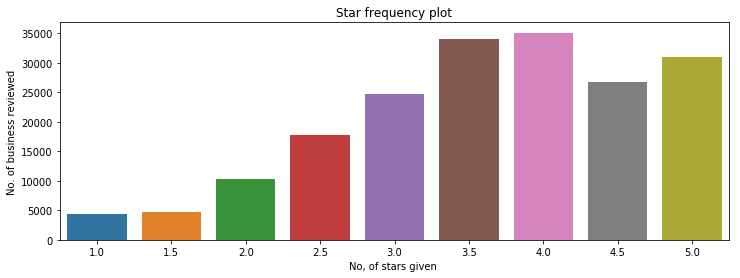

In [10]:
#Get the distribution of the ratings
bar = bus_data['stars'].value_counts()
#bar = bar.sort_index()
#plot
plt.figure(figsize=(12,4))
seaborn_plt = sns.barplot(bar.index, bar.values)
plt.title("Star frequency plot")
plt.ylabel('No. of business reviewed')
plt.xlabel('No, of stars given ')
plt.show()

In [11]:
noise_levels = bus_data['attributes.NoiseLevel'].value_counts().index
noise_levels #type LIST

Index(['average', 'quiet', 'loud', 'very_loud'], dtype='object')

In [12]:
noise_levels_count = bus_data['attributes.NoiseLevel'].value_counts().values

In [13]:
bus_data['attributes.NoiseLevel'].value_counts().index

Index(['average', 'quiet', 'loud', 'very_loud'], dtype='object')

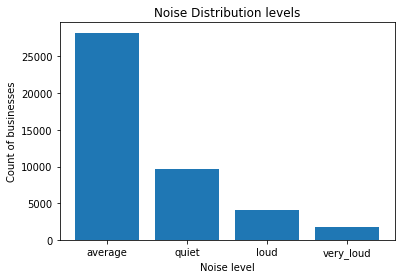

In [14]:
plt.bar(noise_levels, noise_levels_count)
plt.title("Noise Distribution levels")
plt.ylabel('Count of businesses')
plt.xlabel('Noise level')
plt.show()

In [15]:
#read user file
review_data = pd.read_csv("data/yelp_academic_dataset_review.csv")

In [16]:
review_data.head()  #5996996 rows × 9 columns

,funny,review_id,useful,business_id,user_id,text,date,stars,cool
0,0,x7mDIiDB3jEiPGPHOmDzyw,0,iCQpiavjjPzJ5_3gPD5Ebg,msQe1u7Z_XuqjGoqhB0J5g,The pizza was okay. Not the best I've had. I p...,2011-02-25,2,0
1,0,dDl8zu1vWPdKGihJrwQbpw,0,pomGBqfbxcqPv14c3XH-ZQ,msQe1u7Z_XuqjGoqhB0J5g,I love this place! My fiance And I go here atl...,2012-11-13,5,0
2,1,LZp4UX5zK3e-c5ZGSeo3kA,3,jtQARsP6P-LbkyjbO1qNGg,msQe1u7Z_XuqjGoqhB0J5g,Terrible. Dry corn bread. Rib tips were all fa...,2014-10-23,1,1
3,0,Er4NBWCmCD4nM8_p1GRdow,2,elqbBhBfElMNSrjFqW3now,msQe1u7Z_XuqjGoqhB0J5g,Back in 2005-2007 this place was my FAVORITE t...,2011-02-25,2,0
4,0,jsDu6QEJHbwP2Blom1PLCA,0,Ums3gaP2qM3W1XcA5r6SsQ,msQe1u7Z_XuqjGoqhB0J5g,Delicious healthy food. The steak is amazing. ...,2014-09-05,5,0


In [17]:
# in review.csv multiple users give review(stars,rating) to businesses
# we need to find whether there is any co-relation between user's ratings and the business noise levels
# 1. find the ratings given for each business

In [18]:
len(review_data.business_id.unique())

188593

In [19]:
review_data_2 = review_data.copy()

In [20]:
review_data_2 = review_data_2.drop(['useful', 'funny','cool','review_id' ,'user_id','text','date'], axis=1)

In [21]:
review_data_2.groupby(['business_id'])['stars'].agg('count')
# data_grouped_female = data_female.groupby(['Name'])['Count'].agg('sum')
# df.pivot_table(index='Account_number', columns='Product',  aggfunc=len, fill_value=0)


business_id
--1UhMGODdWsrMastO9DZw      24
--6MefnULPED_I942VcFNA      39
--7zmmkVg-IMGaXbuVd0SQ      54
--8LPVSo5i0Oo61X01sV9A       4
--9QQLMTbFzLJ_oT-ON3Xw      11
--9e1ONYQuAa-CB_Rrw7Tw    1546
--DaPTJW3-tB1vP-PfdTEg      45
--DdmeR16TRb3LsjG0ejrQ       5
--EF5N7P70J_UYBTPypYlA       5
--EX4rRznJrltyn-34Jz1w       4
--FBCX-N37CMYDfs790Bnw     125
--FLdgM0GNpXVMn74ppCGw      12
--GM_ORV2cYS-h38DSaCLw       8
--Gc998IMjLn8yr-HTzGUg       3
--I7YYLada0tSLkORTHb5Q      83
--KCl2FvVQpvjzmZSPyviA      13
--KQsXc-clkO7oHRqGzSzg      35
--Ni3oJ4VOqfOEu7Sj2Vzg       6
--Rsj71PBe31h5YljVseKA       8
--S62v0QgkqQaVUhFnNHrw      35
--SrzpvFLwP_YFwB_Cetow      44
--TcDRzRIxhvHM4DSgEuMA       5
--U98MNlDym2cLn36BBPgQ       4
--VMPfs4zfZJtQbqzJsNhg      10
--WsruI0IGEoeRmkErU5Gg      15
--Y7NhBKzLTbNliMUX_wfg      12
--YPwqIlRJrhHkJcjY3eiA       3
--ab39IjZR_xUf81WyTyHg      11
--cZ6Hhc9F7VkKXxHMVZSQ     333
--cgVkbWTiga3OYTkymKqA      13
                          ... 
zzXuJF6UUT1kgTyCsmgDmQ     

In [22]:
review_data_3 = review_data_2.pivot_table(index='business_id', columns='stars',  aggfunc=len, fill_value=0)

In [23]:
review_data_3

stars,0,1,2,3,4,5
business_id,,,,,,
--1UhMGODdWsrMastO9DZw,0,2,2,1,7,12
--6MefnULPED_I942VcFNA,0,6,6,10,11,6
--7zmmkVg-IMGaXbuVd0SQ,0,5,4,6,17,22
--8LPVSo5i0Oo61X01sV9A,0,1,0,1,0,2
--9QQLMTbFzLJ_oT-ON3Xw,0,3,1,0,1,6
--9e1ONYQuAa-CB_Rrw7Tw,0,51,137,176,420,762
--DaPTJW3-tB1vP-PfdTEg,0,4,3,9,16,13
--DdmeR16TRb3LsjG0ejrQ,0,0,2,0,3,0
--EF5N7P70J_UYBTPypYlA,0,1,2,0,1,1


In [24]:
# %%time
# review_data_star_pivot = review_data_2.pivot_table(index = 'business_id', columns = 'stars', aggfunc = sum)

In [25]:
#review_data_star_pivot

In [26]:
#now get a list of business ids , corresponding noise levels and avg. stars

In [27]:
# bus_data[bus_data['business_id']=='--1UhMGODdWsrMastO9DZw']

In [28]:
bus_data_2 = bus_data[['business_id','stars','attributes.NoiseLevel']]
bus_data_2

,business_id,stars,attributes.NoiseLevel
0,Apn5Q_b6Nz61Tq4XzPdf9A,4.0,average
1,AjEbIBw6ZFfln7ePHha9PA,4.5,NaN
2,O8S5hYJ1SMc8fA4QBtVujA,4.0,average
3,bFzdJJ3wp3PZssNEsyU23g,1.5,NaN
4,8USyCYqpScwiNEb58Bt6CA,2.0,NaN
5,45bWSZtniwPRiqlivpS8Og,4.0,NaN
6,9A2quhZLyWk0akUetBd8hQ,4.0,NaN
7,6OuOZAok8ikONMS_T3EzXg,2.0,NaN
8,8-NRKkPY1UiFXW20WXKiXg,2.5,average
9,UTm5QZThPQlT35mkAcGOjg,3.5,NaN


In [29]:
bus_data_2 = bus_data_2.dropna()

In [30]:
bus_data_2

,business_id,stars,attributes.NoiseLevel
0,Apn5Q_b6Nz61Tq4XzPdf9A,4.0,average
2,O8S5hYJ1SMc8fA4QBtVujA,4.0,average
8,8-NRKkPY1UiFXW20WXKiXg,2.5,average
10,KapTdGyGs7RK0c68Z6hhhg,1.5,loud
11,tZnSodhPwNr4bzrwJ1CSbw,4.0,average
12,_c3ixq9jYKxhLUB0czi0ug,4.0,average
13,bBUMib8l6Me1ZB1_Qkezkg,3.5,quiet
16,r89Re4FNgVWHgBfjCVZyVw,3.5,average
22,3ByGQOVgds2YEu6kzl-XEQ,2.5,average
27,PMDlKLd0Mxj0ngCpuUmE5Q,3.5,average


In [31]:
#bus_merge_noise_star = pd.merge(bus_data_2, review_data_3, on=['business_id'], how='outer')
bus_merge_noise_star = pd.merge(bus_data_2, review_data_3, on=['business_id'], how='inner')
bus_merge_noise_star.head()

,business_id,stars,attributes.NoiseLevel,0,1,2,3,4,5
0,Apn5Q_b6Nz61Tq4XzPdf9A,4.0,average,0,1,2,2,5,14
1,O8S5hYJ1SMc8fA4QBtVujA,4.0,average,0,1,0,0,2,2
2,8-NRKkPY1UiFXW20WXKiXg,2.5,average,0,17,3,6,10,4
3,KapTdGyGs7RK0c68Z6hhhg,1.5,loud,0,8,1,2,1,0
4,tZnSodhPwNr4bzrwJ1CSbw,4.0,average,0,5,9,22,61,49


In [32]:
bus_merge_noise_star.columns = ['business_id', 'avg_stars','NoiseLevel'
                                ,'star_0','star_1','star_2','star_3','star_4','star_5']

In [33]:
bus_merge_noise_star

,business_id,avg_stars,NoiseLevel,star_0,star_1,star_2,star_3,star_4,star_5
0,Apn5Q_b6Nz61Tq4XzPdf9A,4.0,average,0,1,2,2,5,14
1,O8S5hYJ1SMc8fA4QBtVujA,4.0,average,0,1,0,0,2,2
2,8-NRKkPY1UiFXW20WXKiXg,2.5,average,0,17,3,6,10,4
3,KapTdGyGs7RK0c68Z6hhhg,1.5,loud,0,8,1,2,1,0
4,tZnSodhPwNr4bzrwJ1CSbw,4.0,average,0,5,9,22,61,49
5,_c3ixq9jYKxhLUB0czi0ug,4.0,average,0,13,29,40,113,82
6,bBUMib8l6Me1ZB1_Qkezkg,3.5,quiet,0,2,0,6,7,4
7,r89Re4FNgVWHgBfjCVZyVw,3.5,average,0,3,1,1,3,4
8,3ByGQOVgds2YEu6kzl-XEQ,2.5,average,0,1,0,2,0,0
9,PMDlKLd0Mxj0ngCpuUmE5Q,3.5,average,0,3,2,7,7,6


In [34]:
quiet_stars = bus_merge_noise_star[bus_merge_noise_star['NoiseLevel']=='quiet']['avg_stars']
avg_noise_stars = bus_merge_noise_star[bus_merge_noise_star['NoiseLevel']=='average']['avg_stars']
loud_stars = bus_merge_noise_star[bus_merge_noise_star['NoiseLevel']=='loud']['avg_stars']
very_loud_stars = bus_merge_noise_star[bus_merge_noise_star['NoiseLevel']=='very_loud']['avg_stars']
type(quiet_stars)

pandas.core.series.Series

In [35]:
print("length - quiet, avg_noise, loud, very_lod", len(quiet_stars), " ", len(avg_noise_stars), " "
     , len(loud_stars), " ", len(very_loud_stars), " ")

length - quiet, avg_noise, loud, very_lod 9651   28219   4082   1758  


In [36]:
np.mean(np.array(quiet_stars.tolist()))

3.5821676510206197

In [37]:
np.mean(np.array(avg_noise_stars.tolist()))

3.5076012615613594

In [38]:
np.mean(np.array(loud_stars.tolist()))

3.2792748652621264

In [39]:
np.mean(np.array(very_loud_stars.tolist()))

3.0583048919226394

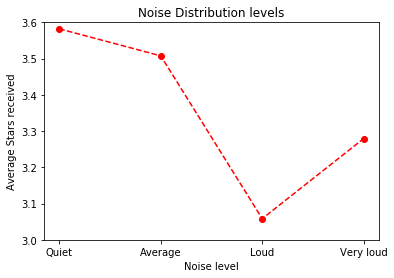

In [40]:
plt.plot( ['Quiet','Average','Loud','Very loud'] , [np.mean(np.array(quiet_stars.tolist())),
                                                    np.mean(np.array(avg_noise_stars.tolist())),
                                                    np.mean(np.array(very_loud_stars.tolist())),
                                                    np.mean(np.array(loud_stars.tolist()))] 
        ,'--ro')
plt.title("Noise Distribution levels")
plt.ylabel('Average Stars received')
plt.xlabel('Noise level')

axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([3,3.6])

plt.show()

(future topic) Who tends to give less rating: men or women?